### Case Study: Nifty 50 Stock Market Data Analysis

Introduction

This case study aims to analyze historical stock market data for current Nifty 50 companies from 2000 to 2021. Each record represents a single day of trading and includes ticker name, volume, and high, low, open, and close prices. The analysis will focus on ranking stocks by mean volume and trades, identifying the top and worst performing stocks using delta price percentage, and assessing volatility using standard deviation and coefficient of variation.

Objectives

Rank overall, by industry, and by single title (top 5) using mean volume and trades.

Calculate the mean and sum of trades by ticker and rank the top 5.

Identify the top 5 best and worst stocks using delta price percentage since inception.

Calculate the standard deviation and coefficient of variation for each stock or sector.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = [pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\ADANIPORTS.csv'), pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\ASIANPAINT.csv'), 
     pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\AXISBANK.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\BAJAJ-AUTO.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\BAJAJFINSV.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\BAJFINANCE.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\BHARTIARTL.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\BPCL.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\BRITANNIA.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\CIPLA.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\COALINDIA.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\DRREDDY.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\EICHERMOT.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\GAIL.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\GRASIM.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\HCLTECH.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\HDFC.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\HDFCBANK.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\HEROMOTOCO.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\HINDALCO.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\HINDUNILVR.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\ICICIBANK.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\INDUSINDBK.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\INFRATEL.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\INFY.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\IOC.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\ITC.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\JSWSTEEL.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\KOTAKBANK.csv'),pd.read_csv(r'C:\Users\Shaurya Tiwari\Desktop\EDA\Project-15\LT.csv')]

In [8]:
combined_dataset = pd.concat(data, ignore_index=True)

C:\Users\Shaurya Tiwari\AppData\Local\Temp\ipykernel_6648\3843067329.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_dataset = pd.concat(data, ignore_index=True)


In [9]:
combined_dataset.to_csv('combined_dataset.csv', index=False)

In [12]:
data

[            Date      Symbol Series  Prev Close    Open     High     Low  \
 0     2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.00   
 1     2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.00   
 2     2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.00   
 3     2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.00   
 4     2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.00   
 ...          ...         ...    ...         ...     ...      ...     ...   
 3317  2021-04-26  ADANIPORTS     EQ      725.35  733.00   739.65  728.90   
 3318  2021-04-27  ADANIPORTS     EQ      730.75  735.00   757.50  727.35   
 3319  2021-04-28  ADANIPORTS     EQ      749.15  755.00   760.00  741.10   
 3320  2021-04-29  ADANIPORTS     EQ      746.25  753.20   765.85  743.40   
 3321  2021-04-30  ADANIPORTS     EQ      746.75  739.00   759.45  724.50   
 
        Last   Close    VWAP    Volume      Turnover    Trades  \
 0     9

### 1. Ranking overall, by Industry, and by single title (top 5), using mean Volume (and Trades)

<Axes: title={'center': 'Top 5 Series by Mean Volume and Trades'}, xlabel='Series'>

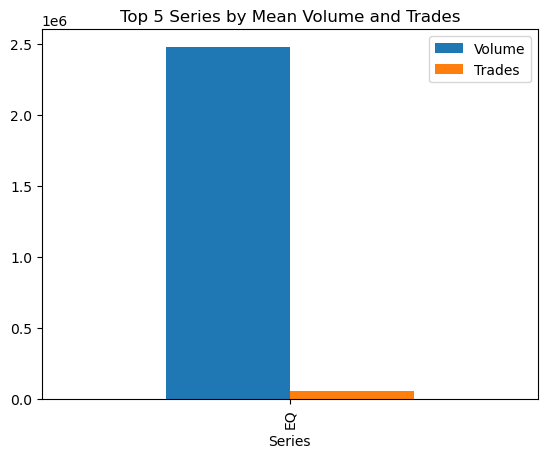

In [15]:
# Group by Industry

industry_ranking = combined_dataset.groupby('Series').agg({'Volume' : 'mean', 'Trades' : 'mean'}).sort_values(by= 'Volume', ascending=False).head(5)

industry_ranking.plot(kind='bar', y=['Volume', 'Trades'], title='Top 5 Series by Mean Volume and Trades')

### 2. Ranking of Must trading stock Since Inception (using Trades)

<Axes: title={'center': 'Top 5 Tickers by Sum of Trades Since Inception'}, xlabel='Symbol'>

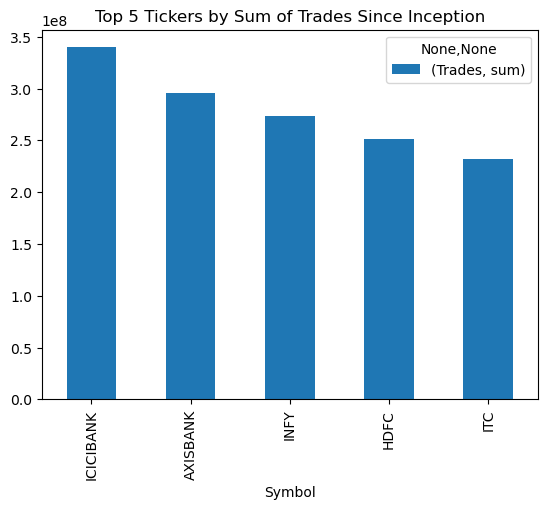

In [22]:
since_inception_ranking = combined_dataset.groupby('Symbol').agg({'Trades': ['mean', 'sum']}).sort_values(by=('Trades', 'sum'), ascending=False).head(5)

since_inception_ranking.plot(kind='bar', y=('Trades', 'sum'), title='Top 5 Tickers by Sum of Trades Since Inception')

### 3. Top 5 best stocks using delta price % Since Inception

<Axes: title={'center': 'Top 5 Stocks by Delta Price % Since Inception'}, xlabel='Symbol'>

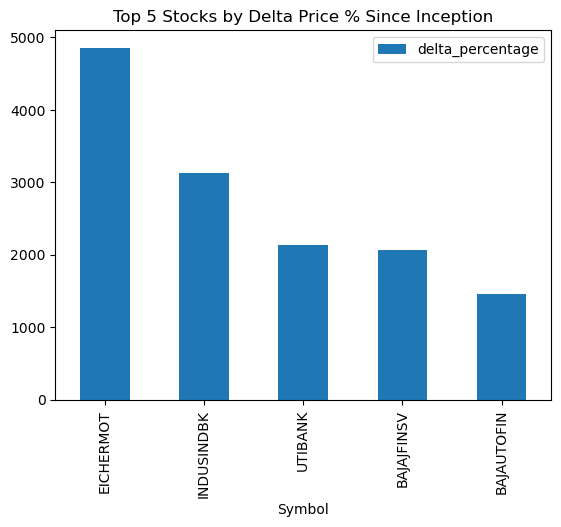

In [28]:
combined_dataset['Date'] = pd.to_datetime(combined_dataset['Date'])
price_change = combined_dataset.groupby('Symbol')['Close'].agg(['first', 'last'])
price_change['delta_percentage'] = ((price_change['last'] - price_change['first']) / price_change['first']) * 100
best_stocks = price_change.sort_values(by='delta_percentage', ascending=False).head(5)


best_stocks.plot(kind='bar', y='delta_percentage', title='Top 5 Stocks by Delta Price % Since Inception')

### 4. Top 5 worst stocks using delta price % Since Inception

<Axes: title={'center': 'Top 5 Stocks by Delta Price % Since Inception'}, xlabel='Symbol'>

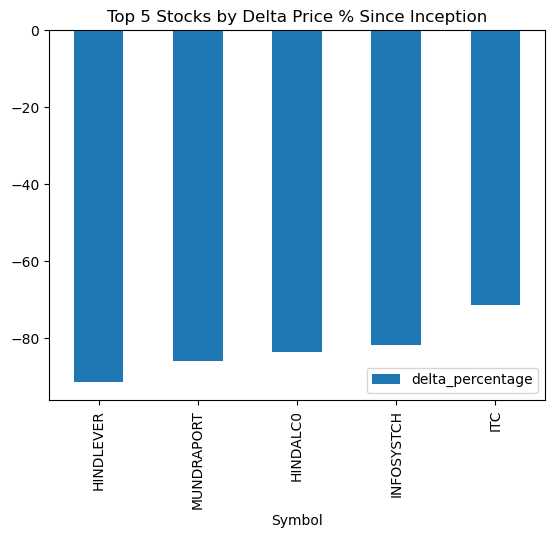

In [29]:
worst_stocks = price_change.sort_values(by='delta_percentage').head(5)
worst_stocks.plot(kind='bar', y='delta_percentage', title='Top 5 Stocks by Delta Price % Since Inception')


### 5. Standard deviation and Coefficient of Variation

<Axes: title={'center': 'Coefficient of Variation for Each Stock'}, xlabel='Symbol'>

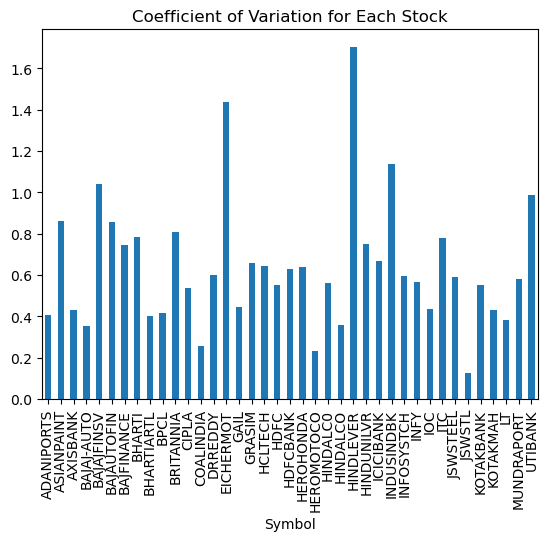

In [31]:
std_deviation = combined_dataset.groupby('Symbol')['Close'].std()
mean_prices = combined_dataset.groupby('Symbol')['Close'].mean()
coefficient_of_variation = std_deviation / mean_prices

coefficient_of_variation.plot(kind='bar', title='Coefficient of Variation for Each Stock')



### Recommendations

Investment Opportunities: Investors should consider the top-performing stocks and industries by volume and trades as potential investment opportunities.

Risk Assessment: Stocks with high coefficient of variation should be assessed for higher risk, while those with low variation may be considered more stable.

Monitoring: Continuously monitor the top and worst performing stocks to make informed investment decisions.

Volatility Management: Use the volatility analysis to manage risk and diversify portfolios accordingly.